# Employee retention 
Predict when the employee is going to quit
1.  build a table with 3 columns, day, emplyee_headcount, company_id
2. What are the main factors that derive employee churn? Why?
3. add one more factor to explain employee churn.


In [68]:
import numpy as np
import pandas as pd
import datetime
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
df = pd.read_csv('employee_retention_data.csv', parse_dates = True)
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


C:\Users\Jason\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


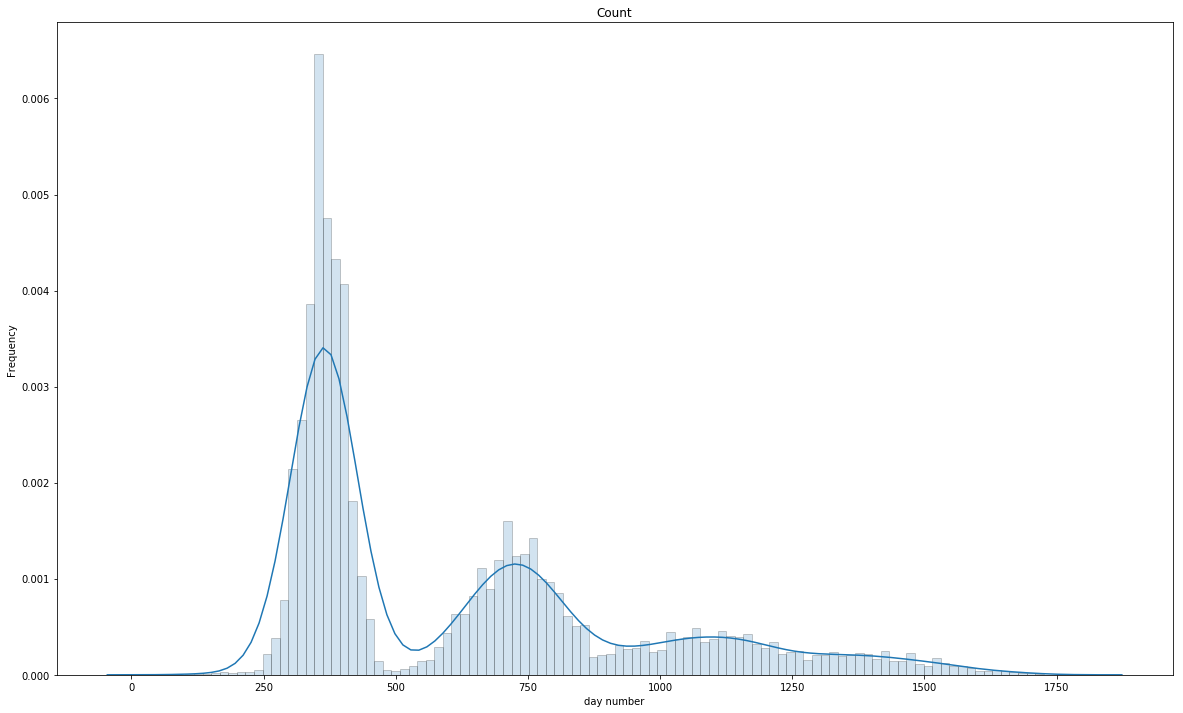

In [118]:
df['join_date']= pd.DatetimeIndex(df['join_date'])
df['quit_date']= pd.DatetimeIndex(df['quit_date'])
df['work_time']= df['quit_date']- df['join_date']
#df['work_time'].head()
#sns.distplot(df['work_time'].value_counts())
hist_kws = {'histtype':'bar','edgecolor':'black','alpha':0.2}
work_days = df.loc[~df['quit_date'].isnull(),'work_time'].apply(lambda x: x.days)
#np.array(list(map(lambda x: x.days, df.loc[~df['quit_date'].isnull(),'work_time'])))
#df['work_time'].head()
ax = sns.distplot(work_days,bins =100, hist_kws = hist_kws)
ax.set_xlabel('day number')
ax.set_ylabel('Frequency')
ax.set_title('Count')
ax.figure.set_size_inches(20,12)

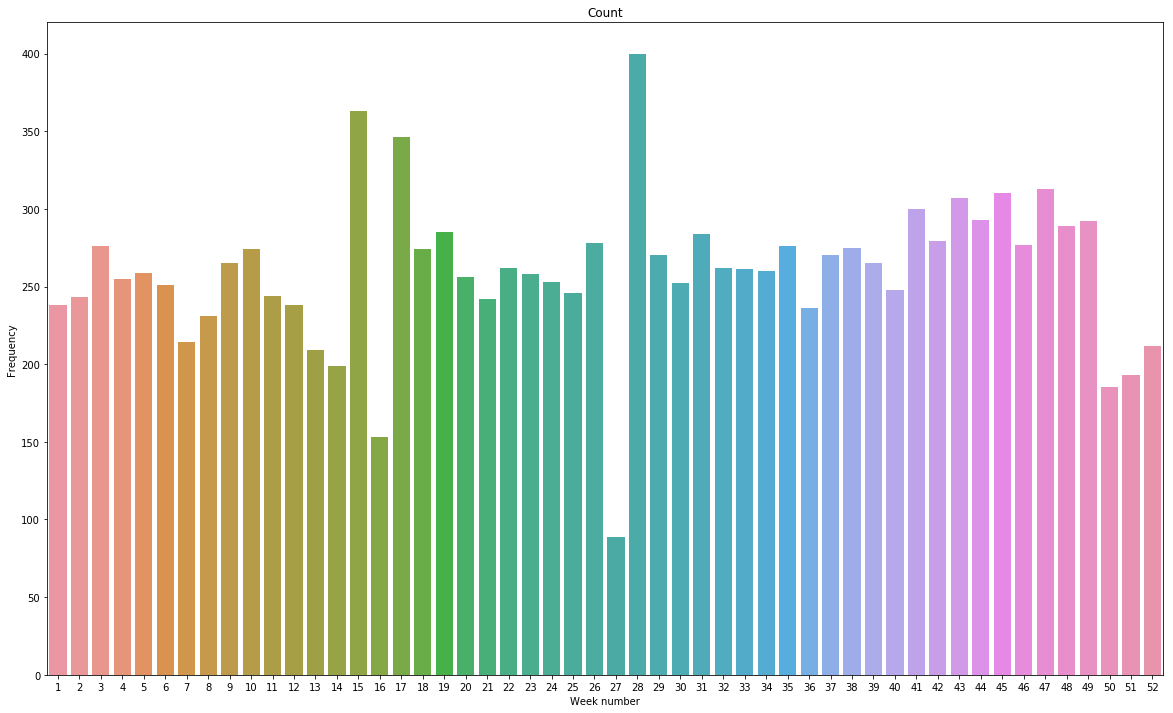

In [117]:
hist_kws = {'histtype':'bar','edgecolor':'black','alpha':0.2}
quit_week = df.loc[~df['quit_date'].isnull(),'quit_date'].apply(lambda x: x.week)
#np.array(list(map(lambda x: x.week, df.loc[~df['quit_date'].isnull(),'quit_date'])))
#df['work_time'].head()
ax = sns.countplot(quit_week)
ax.set_xlabel('Week number')
ax.set_ylabel('Frequency')
ax.set_title('Count')
ax.figure.set_size_inches(20,12)

In [ ]:
#df1 = df.groupby(['company_id','join_date','quit_date'])['employee_id'].count()
#df.loc[df['join_date']==df['quit_date'] ]
dates = pd.date_range(start = '2011-01-24',end = '2015-12-13')
companies= df['company_id'].sort_values().unique()
d = []
comp =[]
n =[]
for date in dates:
    for company in companies:
        n_join = len(df[(df['join_date']== date) & (df['company_id']== company)])
        n_quit = len(df[(df['quit_date']== date) & (df['company_id']== company)])
        d.append(date)
        comp.append(company)
        n.append(n_join- n_quit)
        #s.append([ date,company, n_join- n_quit])
#df2 =pd.DataFrame({'dates':d,'company':comp, 'headcount':n})
        
#df2.head()

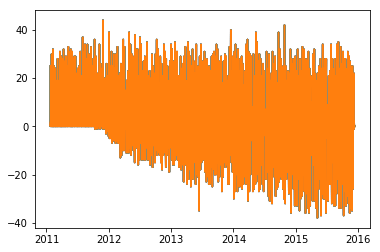

In [74]:
#df.groupby(['company_id','join_date','quit_date'])['employee_id'].count()
#df2.head()
#n
df2 =pd.DataFrame({'dates':d,'company':comp, 'headcount':n})
df2.head()
#for i in df2['company'].unique():
    #plt.plot(df2['dates'], df2['headcount'])

In [41]:
df['work_time'].describe()

count                       13510
mean     613 days 11:41:01.643227
std      328 days 14:56:33.800149
min             102 days 00:00:00
25%             361 days 00:00:00
50%             417 days 00:00:00
75%             781 days 00:00:00
max            1726 days 00:00:00
Name: work_time, dtype: object

In [47]:
#df.head()
df0 = df.drop(['employee_id','join_date','quit_date'], axis =1)
df0.head()

,company_id,dept,seniority,salary,work_time
0,7,customer_service,28,89000.0,585 days
1,7,marketing,20,183000.0,340 days
2,4,marketing,14,101000.0,NaT
3,7,customer_service,20,115000.0,389 days
4,2,data_science,23,276000.0,1040 days


In [57]:
df0 =pd.get_dummies(df0)
df0.head()
df0['is_continue']= 0 
df0.loc[df0['work_time'].isnull(), 'is_continue'] =1
df0.drop(['work_time'], axis =1,)
y= df0['is_continue']
X = df0.drop(['is_continue','work_time'], axis =1)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y)
lrv_fit = RandomForestClassifier()
lrv_fit.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
lrv_fit.predict(x_train)
print('\n Train data RandomForest Classification report:\n\n',classification_report(y_train, lrv_fit.predict(x_train)))
print('\n Test data RandomForest Classification report:\n\n',classification_report(y_test, lrv_fit.predict(x_test)))


 Train data RandomForest Classification report:

              precision    recall  f1-score   support

          0       0.87      0.91      0.89     10133
          1       0.88      0.83      0.86      8393

avg / total       0.87      0.87      0.87     18526


 Test data RandomForest Classification report:

              precision    recall  f1-score   support

          0       0.55      0.60      0.57      3377
          1       0.45      0.40      0.43      2799

avg / total       0.50      0.51      0.51      6176



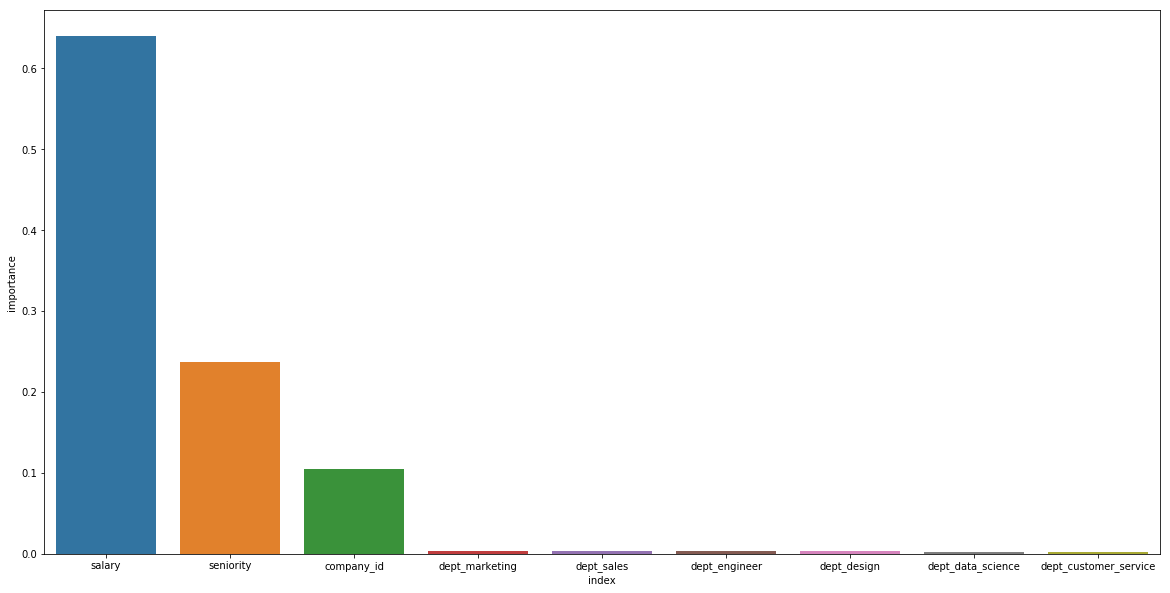

In [65]:
importance = lrv_fit.feature_importances_
imp_features = pd.DataFrame({'index':X.columns, 'importance':importance}).sort_values(by= 'importance', ascending = False)
_ = sns.barplot(imp_features['index'], imp_features['importance'])
_.figure.set_size_inches([20,10])

## By plotting the importance, we can clearly see the importance features are: salary, seniority, company_id

## If I have to add one variable, that would be salary

In [87]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,work_time
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585 days
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340 days
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389 days
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040 days


C:\Users\Jason\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'pdf')

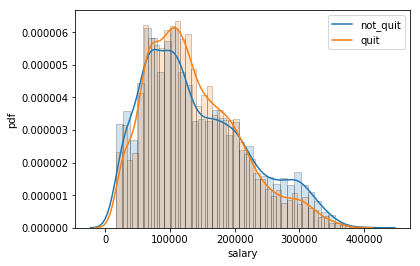

In [99]:
# Visualization 
kde_kws1 = {'label':'not_quit'}
kde_kws2 = {'label':'quit'}
hist_kws = {'histtype':'bar','edgecolor':'black','alpha':0.2}#kde_kws=kde_kws,
ax = sns.distplot(df.loc[df['work_time'].isnull(),'salary'],kde_kws=kde_kws1,hist_kws = hist_kws)
ax2 =sns.distplot(df.loc[~df['work_time'].isnull(),'salary'],kde_kws=kde_kws2,hist_kws = hist_kws)
ax.set_ylabel('pdf')

# 1. Employees usually quit at work anniversaries to get their bonus before they left. 
## 2.  Employees will very high or very low salary have lower chances of quitting.
3. It is possible that for lower salary employees, it's hard to find other jobs if they quit.
4. For high salary employees, they are satisfied by their compensation, they are less inclined to quit.
5. If the employee is satu